## IMSA training by Ekwacu Samuel (ekwacu@gmail.com)

### Analysing Gridded Network Common Data Form (NetCDF) Data
### 1. Plotting climatology

There are several data formats for gridded datasets. Examples include Grib, HDF5, raster (geotiff). However, netcdf (.nc) remains the most preffered in climate science. NetCDF (network Common Data Form) is a file format for storing multidimensional and multivariable scientific data (variables) such as temperature, humidity, pressure, wind speed, and direction. It is a self describing data format which has the metadata embeded within each file. More specifically, NetCDF is a set of software libraries and self-describing, machine-independent data formats that support the creation, access, and sharing of array-oriented scientific data. It is also a community standard for sharing scientific data.

Data in netCDF format is:

- Self-Describing: A netCDF file includes information about the data it contains.
- Portable: A netCDF file can be accessed by computers with different ways of storing integers, characters, and floating-point numbers.
- Scalable: Small subsets of large datasets in various formats may be accessed efficiently through netCDF interfaces, even from remote servers.
- Appendable: Data may be appended to a properly structured netCDF file without copying the dataset or redefining its structure.
- Sharable: One writer and multiple readers may simultaneously access the same netCDF file.
- Archivable: Access to all earlier forms of netCDF data will be supported by current and future versions of the software.
The above information was retrieved from the Unidata page (https://www.unidata.ucar.edu/software/netcdf/). Kindly visit the page for more informtion about this data format

The data we are going to analyse is composed of merged staion records and satellite estimates data from the Climate Hazards Group InfraRed Precipitation with Stations (CHIRPS)and Climate Hazards Group InfraRed Temperature with station (CHIRTS) data from the University of California at Santa Barbara.
In this part we will perform the analysis based on the following steps:

1. Import the appropriate modules to the Python environment
2. Define the data paths
3. Read in the data into Python environment
4. Subset the data according to the climatology period of interest
5. Group the data into seasons (4)
6. Get the seasonal means of the data
7. Plot a sample of the data using appropriate modules
8. subset the data to a specific month
9. Students do assignment on temperature data

In [1]:
### Important libries to import
import xarray as xr
import numpy as np
import cmocean # for perceptually uniform colormaps
import cartopy as cr # for geographic mapping
import cartopy.crs as ccrs # for map projections
import matplotlib.pyplot as plt # plotting tool

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from descartes import PolygonPatch
import matplotlib.path as mplPath
from shapely.geometry.polygon import Polygon
import geopandas as gpd
import shapefile as shp
import regionmask

C:\Users\Samuel-NUIST\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [52]:
chirps = xr.open_dataset('C:/Users/Samuel-NUIST/Desktop/lecture3/chirps_RFE_monthly_1981-2021-EA.nc')
#chirps
chirps.data_vars

Data variables:
    precipitation  (T, Y, X) float32 ...

In [55]:
TP = xr.open_dataset('C:/Diabatic_data/TP1.nc')
#TP.var

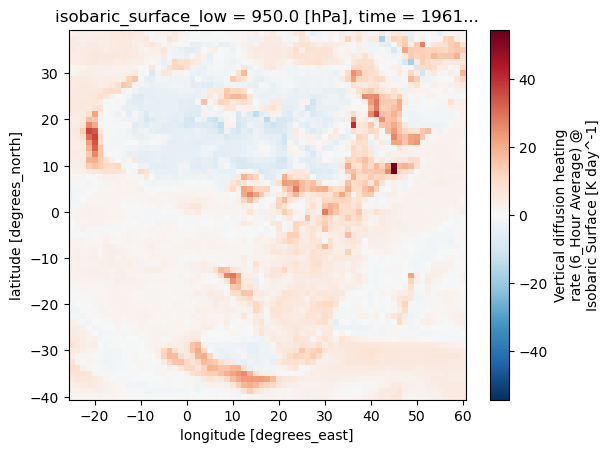

In [56]:
TP['Vertical_diffusion_heating_rate_isobaric_surface_low_Average'].sel(time='1961-01-01 03:00:00').plot()

C:\Users\Samuel-NUIST\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Samuel-NUIST\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
C:\Users\Samuel-NUIST\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\Samuel-NUIST\anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property i

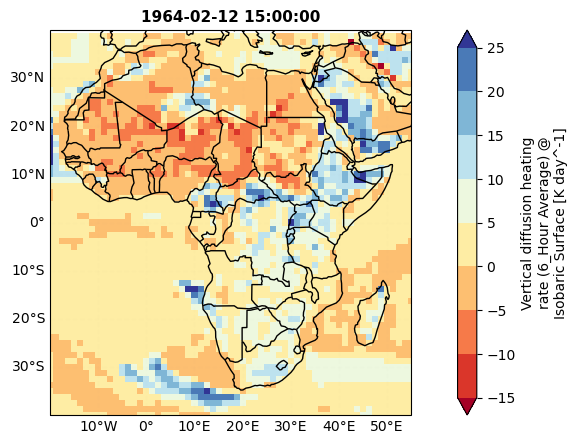

In [57]:
#PLOTING FOR 1 SINGLE MONTHS
fig = plt.figure(figsize=[12,5])

# 111 means 1 row, 1 col and index 1
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=0))
ax.set_extent([-20, 55, -40, 40], crs=ccrs.PlateCarree())
TP['Vertical_diffusion_heating_rate_isobaric_surface_low_Average'].sel(time='1961-01-01 03:00:00').plot(ax=ax, cmap=plt.cm.RdYlBu,
                                            levels=np.arange(-15, 30, 5),extend='both',transform=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=1)
gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.01, linestyle='--')
gl.xlabels_top = False; gl.ylabels_left = True; gl.ylabels_right=False; gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER; gl.yformatter = LATITUDE_FORMATTER
plt.title('1964-02-12 15:00:00',fontsize=11, fontweight='bold')
#plt.savefig('C:/ERSSTv5/output/V wind component diff.png')
plt.show()

In [6]:
#RF_mon=chirps.sel(T='2019-01-16')
RF_mon=chirps['precipitation'].sel(T='2000-10-16')
#RF_mon

In [7]:
obs_clim = chirps.sel(T=slice("1981-01-16", "2010-12-16"))

In [8]:
####For seasonal analysis
obs_seas = obs_clim.groupby('T.season')
## The seasons to plot over
obs_djf = obs_seas['DJF'].mean('T')
obs_mam = obs_seas['MAM'].mean('T')
obs_jja = obs_seas['JJA'].mean('T')
obs_son = obs_seas['SON'].mean('T')
#obs_djf

In [9]:
obs_yrs = (obs_djf + obs_mam + obs_jja + obs_son)
#obs_yrs

In [10]:
sf = gpd.read_file('C://Users//Samuel-NUIST//Desktop//lecture3//EA_Shp//East_Africa-Disolved.shp')  ## Used in Masking
sf2 = shp.Reader('C://Users//Samuel-NUIST//Desktop//lecture3//EA_Shp//EA.shp')       ## Used in plotting

In [11]:
## Mask to the shapefile
ds = regionmask.mask_3D_geopandas(sf, obs_djf.X, obs_djf.Y, lon_name='Lon', lat_name='Lat')
ds1 = obs_djf.where(ds)

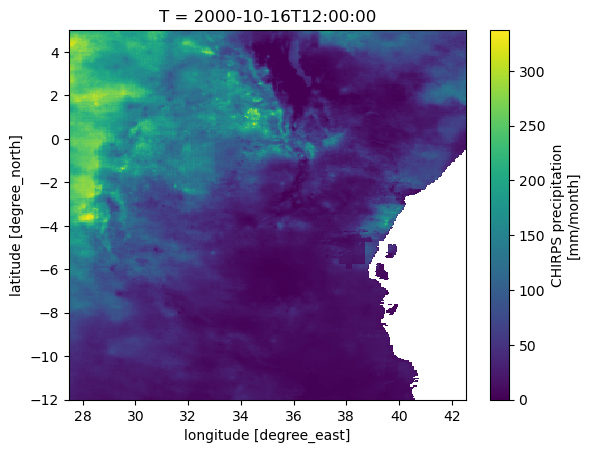

In [12]:
chirps['precipitation'].sel(T='2000-10-16').plot()

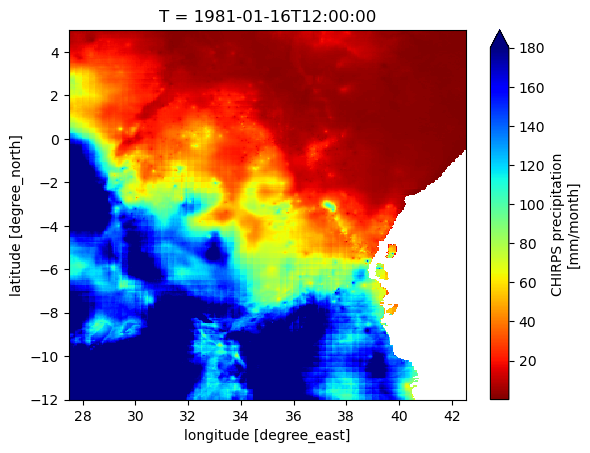

In [13]:
chirps['precipitation'].sel(T='1981-01-16').plot(cmap='jet_r', vmax=180)

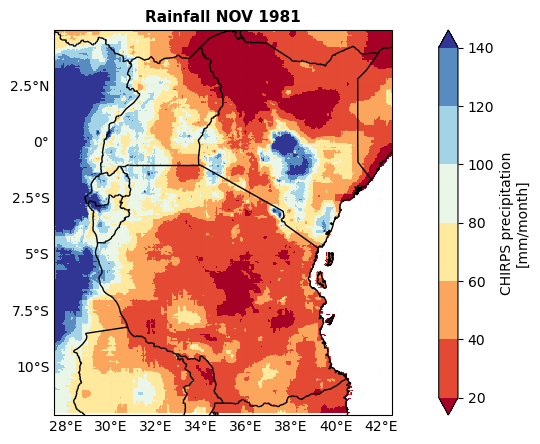

In [44]:
#PLOTING FOR 1 SINGLE MONTHS
fig = plt.figure(figsize=[12,5])

# 111 means 1 row, 1 col and index 1
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=0))
ax.set_extent([27.5, 42.5, -12.1, 5], crs=ccrs.PlateCarree())
chirps['precipitation'].sel(T='1981-11-16').plot(ax=ax, cmap=plt.cm.RdYlBu,levels=np.arange(20, 160, 20),
                   transform=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=1)
gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.01, linestyle='--')
gl.xlabels_top = False; gl.ylabels_left = True; gl.ylabels_right=False; gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER; gl.yformatter = LATITUDE_FORMATTER
plt.title('Rainfall NOV 1981',fontsize=11, fontweight='bold')
#plt.savefig('C:/ERSSTv5/output/V wind component diff.png')
plt.show()

C:\Users\Samuel-NUIST\AppData\Local\Temp\ipykernel_21232\3818014766.py:19: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(bottom=0.08, right=0.8, top=0.8)


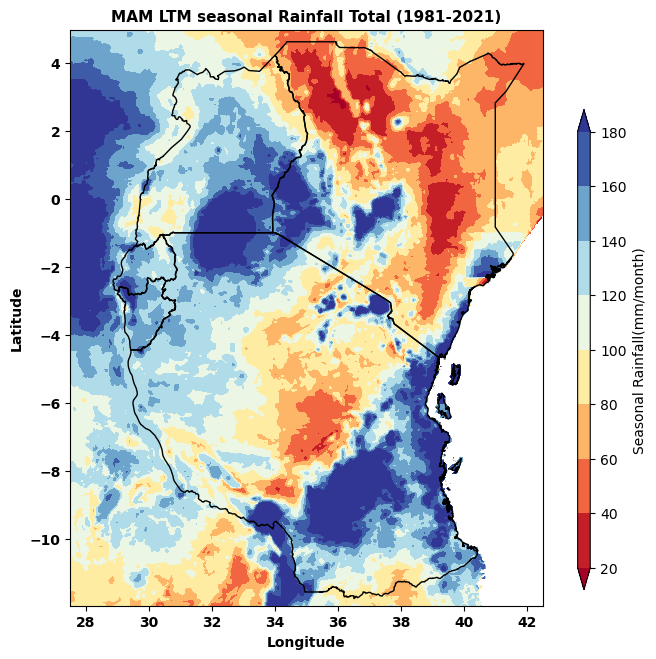

In [26]:
from matplotlib.colors import ListedColormap
none_map = ListedColormap(['none'])
fig, ax = plt.subplots(constrained_layout=True, figsize=(7, 8))

## Plotting the figure
for poly in sf2.shapes():
    poly_geo=poly.__geo_interface__
    ax.add_patch(PolygonPatch(poly_geo, fc='None', ec='black', alpha=1, fill='False', zorder=2))
    
cs = plt.contourf(obs_mam.X, obs_mam.Y, obs_mam.precipitation, cmap=plt.cm.RdYlBu, levels=np.arange(20, 200, 20), extend='both')
## title attributes
plt.title('MAM LTM seasonal Rainfall Total (1981-2021)',fontsize=11, fontweight='bold')
plt.xticks(size = 10, fontweight='bold')
plt.yticks(size = 10, fontweight='bold')
##labling the axis
plt.ylabel('Latitude',fontsize=10, fontweight='bold')
plt.xlabel('Longitude',fontsize=10, fontweight='bold')
##ploting the legend
plt.subplots_adjust(bottom=0.08, right=0.8, top=0.8)
###color bar
fig.colorbar(cs, ax=ax,cax = plt.axes([0.85, 0.1, 0.018, 0.6]), label='Seasonal Rainfall(mm/month)')

# save output
#plt.savefig('D:/Folder_2023/Research/Frank/son_ltm.png')
plt.show()

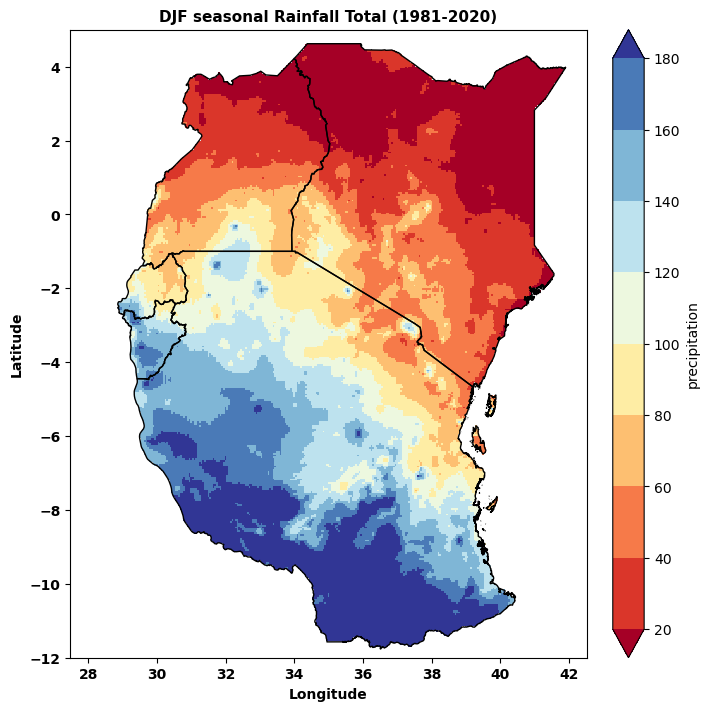

In [27]:
from matplotlib.colors import ListedColormap
none_map = ListedColormap(['none'])
fig, ax = plt.subplots(constrained_layout=True, figsize=(7, 7))

## Plotting the figure
for poly in sf2.shapes():
    poly_geo=poly.__geo_interface__
    ax.add_patch(PolygonPatch(poly_geo, fc='None', ec='black', alpha=1, fill='False', zorder=2))
    
ds1.precipitation.plot(cmap=plt.cm.RdYlBu,extend='both',levels=np.arange(20, 200, 20))
## title attributes
plt.title('DJF seasonal Rainfall Total (1981-2020)',fontsize=11, fontweight='bold')
plt.xticks(size = 10, fontweight='bold')
plt.yticks(size = 10, fontweight='bold')
##labling the axis
plt.ylabel('Latitude',fontsize=10, fontweight='bold')
plt.xlabel('Longitude',fontsize=10, fontweight='bold')
##ploting the legend
#plt.subplots_adjust(bottom=0.1, right=0.7, top=0.8)
###color bar
#fig.colorbar(cs, ax=ax,cax = plt.axes([0.85, 0.1, 0.018, 0.6]), label='Seasonal Rainfall(mm/month)')
#fig.colorbar(ds1.precipitation, ax=ax, cax=plt.axes([0.85, 0.1, 0.018, 0.6]), label='Seasonal Rainfall(mm/month)')
# save output
#plt.savefig(D:/Folder_2023/Research/Frank/djf_ltm.png')
plt.show()

In [29]:
## Plot panel maps
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import numpy as np

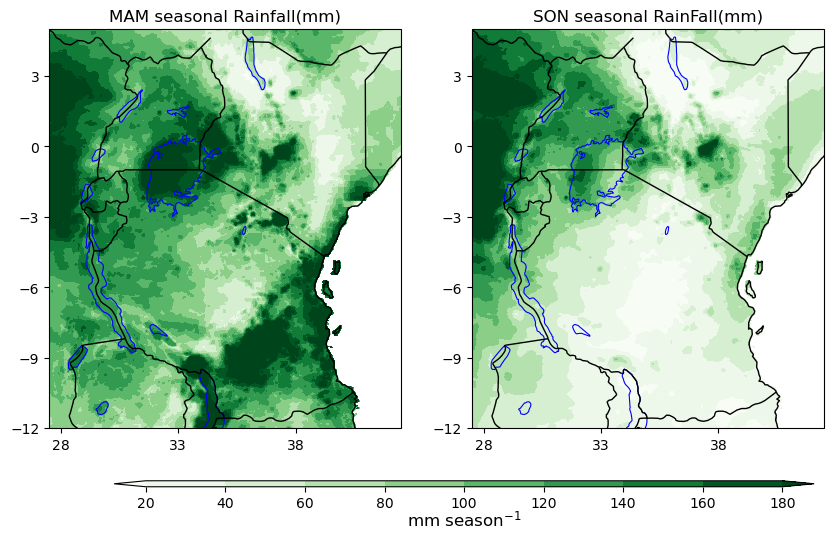

In [30]:
## Let's plot seasonal climatology patterns

fig = plt.figure(figsize=(10, 6))
proj = ccrs.PlateCarree(central_longitude=0)

## Plot 1
ax = plt.subplot(1,2,1, projection=proj)
ax.add_feature(cfeat.BORDERS, linestyle='solid',linewidth=1.)
ax.add_feature(cfeat.LAKES, facecolor='none', edgecolor='black',linewidth=1.)
ax.add_feature(cfeat.COASTLINE,linewidth=1.)

cs = plt.contourf(obs_mam.X, obs_mam.Y, obs_mam.precipitation, cmap=plt.cm.Greens, levels=np.arange(20, 200, 20), extend='both')
ax.set_xticks(range(28, 42, 5), crs=ccrs.PlateCarree(central_longitude=0))
ax.set_yticks(range(-12, 6, 3), crs=ccrs.PlateCarree(central_longitude=0))
lakes_50m = cfeat.NaturalEarthFeature('physical', 'lakes', '50m',edgecolor='k',facecolor='none')
coastline_50m = cfeat.NaturalEarthFeature('physical', 'coastline', '50m',edgecolor='k',facecolor='none')
ax.add_feature(lakes_50m, edgecolor='blue',facecolor='none',linewidth=0.8)
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=1)
#ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
#ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
#labelsx = axa.get_xticklabels()
#labelsy = axa.get_yticklabels()
#plt.setp(labelsx, fontsize=10)
#plt.setp(labelsy, fontsize=10)
ax.set_title('MAM seasonal Rainfall(mm)', fontsize = 12)

# Plot 2
ax = plt.subplot(1,2,2, projection=proj)
ax.add_feature(cfeat.BORDERS, linestyle='solid',linewidth=1.)
ax.add_feature(cfeat.LAKES, facecolor='none', edgecolor='black',linewidth=1.)
ax.add_feature(cfeat.COASTLINE,linewidth=1.)

cs = plt.contourf(obs_son.X, obs_son.Y, obs_son.precipitation, cmap=plt.cm.Greens, levels=np.arange(20, 200, 20), extend='both')
ax.set_xticks(range(28, 42, 5), crs=ccrs.PlateCarree(central_longitude=0))
ax.set_yticks(range(-12, 6, 3), crs=ccrs.PlateCarree(central_longitude=0))
lakes_50m = cfeat.NaturalEarthFeature('physical', 'lakes', '50m',edgecolor='k',facecolor='none')
coastline_50m = cfeat.NaturalEarthFeature('physical', 'coastline', '50m',edgecolor='k',facecolor='none')
ax.add_feature(lakes_50m, edgecolor='blue',facecolor='none',linewidth=0.8)
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=1)
#ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
#ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
#labelsx = ax.get_xticklabels()
#labelsy = ax.get_yticklabels()
#plt.setp(labelsx, fontsize=10)
#plt.setp(labelsy, fontsize=10)
ax.set_title('SON seasonal RainFall(mm)', fontsize = 12)

# colorbars
#plt.subplots_adjust(top=0.97, hspace = 0.001)   ## wspace = 0.05, 
#fig.subplots_adjust(bottom = 0.05)
cax = fig.add_axes([0.19, 0.065, 0.7, 0.01])   ## [left, bottom, width, height]
cb = plt.colorbar(cs, cax, orientation='horizontal', extend = 'both')
#cb.set_label('mm', fontsize = 9, labelpad = -1)
cb.set_label('mm season$^{-1}$', fontsize = 12, labelpad = -1)

#plt.savefig(home_dir + 'plots/' + 'obs_mam_model_climatology.png')
plt.show()

## Plot chirps Srilanka

In [31]:
chirps = xr.open_dataset('C:/Users/Samuel-NUIST/Desktop/lecture3/CHIRPS_monthly_1981-2021-Srilanka.nc')
#chirps

In [32]:
obs_clim = chirps.sel(time=slice("1981-01-16", "2021-12-16"))

In [33]:
####For seasonal analysis
obs_seas = obs_clim.groupby('time.season')
## The seasons to plot over
obs_djf = obs_seas['DJF'].mean('time')
obs_mam = obs_seas['MAM'].mean('time')
obs_jja = obs_seas['JJA'].mean('time')
obs_son = obs_seas['SON'].mean('time')
#obs_son

In [34]:
obs_yrs = (obs_djf + obs_mam + obs_jja + obs_son)
#obs_yrs

In [35]:
##Read the shapefile
sf2 = shp.Reader('C://Users//Samuel-NUIST//Desktop//lecture3//Sirlanka//LKA_adm//LKA_adm1.shp')

C:\Users\Samuel-NUIST\AppData\Local\Temp\ipykernel_21232\3050758736.py:21: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(bottom=0.08, right=0.8, top=0.8)


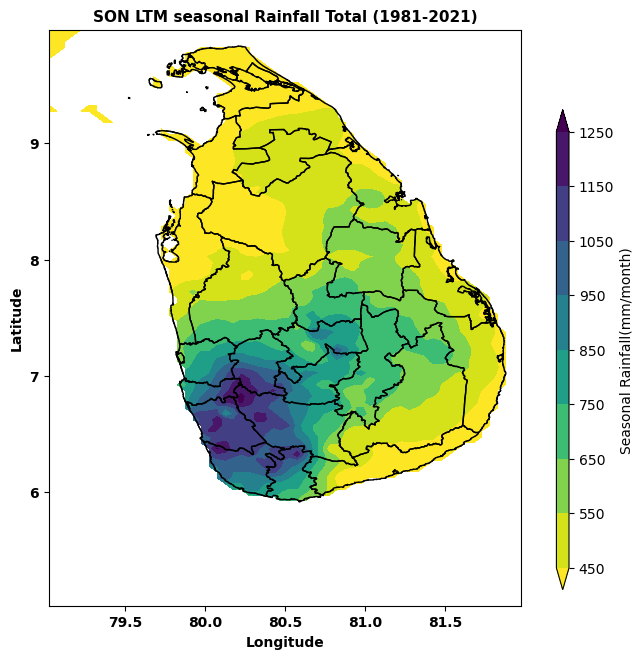

In [36]:
from matplotlib.colors import ListedColormap
none_map = ListedColormap(['none'])
fig, ax = plt.subplots(constrained_layout=True, figsize=(7, 8))

## Plotting the figure
for poly in sf2.shapes():
    poly_geo=poly.__geo_interface__
    ax.add_patch(PolygonPatch(poly_geo, fc='None', ec='black', alpha=1, fill='False', zorder=2))
    
#cs = plt.contourf(obs_son.longitude, obs_son.latitude, obs_son.precip, cmap=plt.cm.RdYlBu, levels=np.arange(20, 200, 20), extend='both')
#cs = plt.contourf(obs_son.longitude, obs_son.latitude, obs_son.precip, cmap=plt.cm.RdYlBu, levels=np.arange(100, 400, 50), extend='both')
cs = plt.contourf(obs_yrs.longitude, obs_yrs.latitude, obs_yrs.precip, cmap=plt.cm.viridis_r, levels=np.arange(450, 1300, 100), extend='both')
## title attributes
plt.title('SON LTM seasonal Rainfall Total (1981-2021)',fontsize=11, fontweight='bold')
plt.xticks(size = 10, fontweight='bold')
plt.yticks(size = 10, fontweight='bold')
##labling the axis
plt.ylabel('Latitude',fontsize=10, fontweight='bold')
plt.xlabel('Longitude',fontsize=10, fontweight='bold')
##ploting the legend
plt.subplots_adjust(bottom=0.08, right=0.8, top=0.8)
###color bar
fig.colorbar(cs, ax=ax,cax = plt.axes([0.85, 0.1, 0.018, 0.6]), label='Seasonal Rainfall(mm/month)')

# save output
#plt.savefig(home_dir + plot_dir + 'Africa_tmean_JRA55-Annual1_1991-2021.png')
plt.show()

In [38]:
### Important libries to import
import xarray as xr
import numpy as np
import cmocean # for perceptually uniform colormaps
import cartopy as cr # for geographic mapping
import cartopy.crs as ccrs # for map projections
import matplotlib.pyplot as plt # plotting tool
import cartopy.feature as cfeature # to add coastlines, land and ocean
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from descartes import PolygonPatch
import matplotlib.path as mplPath
from shapely.geometry.polygon import Polygon
import geopandas as gpd
import shapefile as shp
import regionmask

In [40]:
#Home work Assigment
## Plot seasonal and annual Tmax climatology for East Africa, Uganda, Tanzania, Rwanda, Kenya, Burundi. 
#Tmax = xr.open_dataset('C:/Users/Samuel-NUIST/Desktop/lecture3/chirts_tmax_monthly_1983-2016_EA.nc')
#Tmax

In [41]:
#T2 = xr.open_dataset('C:/ERSSTv5/T2_EA_1992-2022.nc')
#T2

### God Provides 